### Plotly Basics

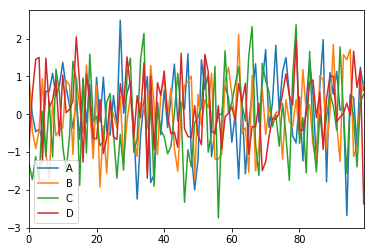

In [3]:
#######
# This script creates a static matplotlib plot
######
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


# create fake data:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.plot()
plt.show()

#### Simply line graph 

In [14]:
#######
# This script creates the same type of plot as basic1.py,
# but in Plotly. Note that it creates an .html file!
######
import numpy as np
import pandas as pd
#import plotly.plotly as py
import plotly.offline as pyo

# create fake data:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
pyo.plot([{
    'x': df.index,
    'y': df[col],
    'name': col
} for col in df.columns])

'file:///home/chengyu/Dev/Plotly-Dashboards-with-Dash/temp-plot.html'

#### Simple scatter plot

In [3]:
#######
# This plots 100 random data points (set the seed to 42 to
# obtain the same points we do!) between 1 and 100 in both
# vertical and horizontal directions.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np

np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

data = [go.Scatter(
    x = random_x,
    y = random_y,
    mode = 'markers',               ## passing additional options
    marker=dict(
        size=12,
        color='rgb(51,204,153)',
        symbol='pentagon',
        line={'width':2}
    )
)]

layout = go.Layout(title='Hello First Plot',
                   xaxis={'title':'My x Axis'},    ## just pass dictonary
                   yaxis=dict(title='My Y Axis'),  ## passing a dict, it is the same
                  hovermode='closest')  

fig = go.Figure(data=data,layout=layout)           ## create a figure object
pyo.plot(fig, filename='scatter1.html')            ## pass in the figure object

'file:///home/chengyu/Dev/Plotly-Dashboards-with-Dash/1-01-PlotlyBasics/scatter1.html'

#### Multiple line graph 

In [11]:
import numpy as np
import plotly.offline as pyo
import plotly.graph_objs as go 
np.random.seed(56)

x_values = np.linspace(0,1,100)
y_values = np.random.randn(100)

trace0 = go.Scatter(x=x_values,y=y_values + 5,
                  mode = 'markers',name='markers')
trace1 = go.Scatter(x=x_values,y=y_values,
                   mode='lines',name='mylines')
trace2 = go.Scatter(x=x_values,y=y_values-5,
                   mode='lines+markers',name='mylines2')

data = [trace0,trace1,trace2]

lyout = go.Layout(title='Line Charts')
fig = go.Figure(data=data,layout=layout)
pyo.plot(fig,filename='line1.html')

'file:///home/chengyu/Dev/Plotly-Dashboards-with-Dash/1-01-PlotlyBasics/line1.html'

In [19]:
import pandas as pd
import plotly.offline as pyo
import plotly.graph_objs as go 

## read pandas form csv
df=pd.read_csv('../SourceData/nst-est2017-alldata.csv')
df.head()

SUMLEV REGION DIVISION  STATE              NAME  CENSUS2010POP  \
0    10.0      0        0    0.0     United States    308745538.0   
1    20.0      1        0    0.0  Northeast Region     55317240.0   
2    20.0      2        0    0.0    Midwest Region     66927001.0   
3    20.0      3        0    0.0      South Region    114555744.0   
4    20.0      4        0    0.0       West Region     71945553.0   

   ESTIMATESBASE2010  POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  ...  \
0        308758105.0      309338421.0      311644280.0      313993272.0  ...   
1         55318350.0       55388349.0       55642659.0       55860261.0  ...   
2         66929794.0       66973360.0       67141501.0       67318295.0  ...   
3        114563024.0      114869241.0      116060993.0      117291728.0  ...   
4         71946937.0       72107471.0       72799127.0       73522988.0  ...   

   RDOMESTICMIG2015  RDOMESTICMIG2016  RDOMESTICMIG2017  RNETMIG2011  \
0          0.000000          0.000000          0.000000     2.720900   
1         -6.103092         -6.619089         -5.559570     1.467950   
2         -3.458531         -3.307295         -2.304640    -1.187519   
3          3.788037          3.592695          2.900528     5.544289   
4          1.613450          2.099001          1.475519     2.798796   

   RNETMIG2012  RNETMIG2013  RNETMIG2014  RNETMIG2015  RNETMIG2016  \
0     2.920371     2.883643     3.173228     3.516743     3.513394   
1     0.779137     0.605873    -0.082832    -0.903931    -1.307503   
2    -1.010696    -0.120354    -0.752477    -1.323952    -1.160735   
3     5.831747     5.362083     6.317310     7.336162     7.113818   
4     3.521423     3.396627     4.163576     5.067452     5.488965   

   RNETMIG2017  
0     3.423941  
1    -0.288930  
2    -0.191323  
3     6.304010  
4     4.737979  

[5 rows x 121 columns]

In [25]:
## do some basic filtering
df2=df[df['DIVISION']=='1']
df2.set_index('NAME',inplace=True)
filter_cols = [col for col in df2.columns if col.startswith('POP')]
df2=df2[filter_cols]
df2.head()

POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
NAME                                                               
Connecticut          3580171.0        3591927.0        3597705.0   
Maine                1327568.0        1327968.0        1328101.0   
Massachusetts        6564943.0        6612178.0        6659627.0   
New Hampshire        1316700.0        1318345.0        1320923.0   
Rhode Island         1053169.0        1052154.0        1052761.0   

               POPESTIMATE2013  POPESTIMATE2014  POPESTIMATE2015  \
NAME                                                               
Connecticut          3602470.0        3600188.0        3593862.0   
Maine                1327975.0        1328903.0        1327787.0   
Massachusetts        6711138.0        6757925.0        6794002.0   
New Hampshire        1322622.0        1328684.0        1330134.0   
Rhode Island         1052784.0        1054782.0        1055916.0   

               POPESTIMATE2016  POPESTIMATE2017  
NAME                                             
Connecticut          3587685.0        3588184.0  
Maine                1330232.0        1335907.0  
Massachusetts        6823721.0        6859819.0  
New Hampshire        1335015.0        1342795.0  
Rhode Island         1057566.0        1059639.0

In [27]:
## build data and plot it 
data = [go.Scatter(x=df2.columns,
                  y=df2.loc[name],
                  name=name) 
        for name in df2.index]
pyo.plot(data)

'file:///home/chengyu/Dev/Plotly-Dashboards-with-Dash/1-01-PlotlyBasics/temp-plot.html'